In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\dell\Downloads\Instruction and Dataset-20240102\Life Expectancy Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [4]:
data.isnull().sum()

Country                              0
Year                                 0
Status                              16
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                           0
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
data.loc[data["Population"] =="#"]["Country"]

64      Antigua and Barbuda
65      Antigua and Barbuda
66      Antigua and Barbuda
67      Antigua and Barbuda
68      Antigua and Barbuda
               ...         
2901                  Yemen
2902                  Yemen
2903                  Yemen
2904                  Yemen
2905                  Yemen
Name: Country, Length: 652, dtype: object

In [9]:
data.Population.isnull().sum()

0

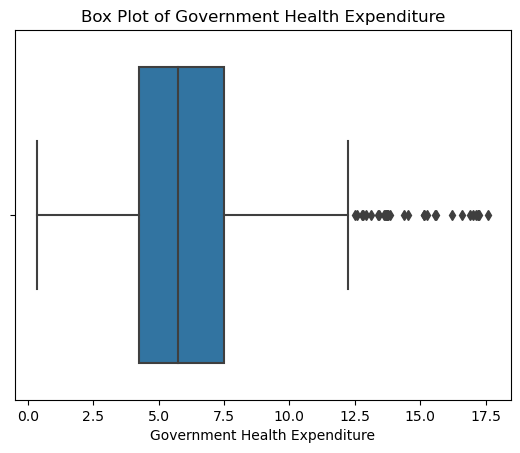

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'government_health_expenditure' with the relevant data
# Replace 'column_name' with the actual column containing expenditure data
sns.boxplot(x=data['Total expenditure'])

plt.title('Box Plot of Government Health Expenditure')
plt.xlabel('Government Health Expenditure')

plt.show()


In [15]:
# Impute missing values with the median
median_value = data['GDP'].median()
data['GDP'].fillna(median_value, inplace=True)

# Display the mean after imputation
mean_after_imputation = data['GDP'].mean()
print("Mean after imputation:", mean_after_imputation)

Mean after imputation: 6611.523863415521


In [18]:
# Impute missing values in the 'status' column with 'Developing'
data['Status'].fillna('Developing', inplace=True)

# Report the frequency of the 'Developing' category
frequency_developing = data['Status'].value_counts()['Developing']
print("Frequency of 'Developing' category:", frequency_developing)

Frequency of 'Developing' category: 2429


In [19]:
albania_gdp_data = data[data['Country'] == 'Albania']

# Calculate the average GDP for Albania
average_gdp_albania = albania_gdp_data['GDP'].mean()

print("Average GDP for Albania:", average_gdp_albania)

Average GDP for Albania: 2119.7266788750003


In [20]:
yemen_mortality_data = data[data['Country'] == 'Yemen']

# Calculate the average adult mortality rate for Yemen
average_adult_mortality_yemen = yemen_mortality_data['Adult mortality'].mean()

print("Average Adult Mortality Rate for Yemen:", average_adult_mortality_yemen)

Average Adult Mortality Rate for Yemen: 211.8125


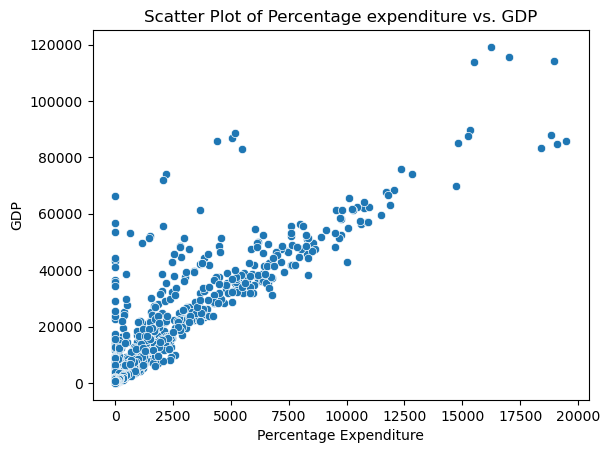

Correlation Coefficient: 0.9018191027160053
There is a strong linear relationship between Percentage Expenditure and GDP.


In [22]:
sns.scatterplot(x='Percentage expenditure', y='GDP', data=data)

# Calculate the correlation coefficient
correlation_coefficient = data['Percentage expenditure'].corr(data['GDP'])

# Add title and labels
plt.title('Scatter Plot of Percentage expenditure vs. GDP')
plt.xlabel('Percentage Expenditure')
plt.ylabel('GDP')

# Show the plot
plt.show()

# Output the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

# Determine if there is a linear relationship
if abs(correlation_coefficient) >= 0.7:  # You can adjust the threshold as needed
    print("There is a strong linear relationship between Percentage Expenditure and GDP.")
else:
    print("There is no strong linear relationship between Percentage Expenditure and GDP.")

In [23]:
mean_adult_mortality_developing = data[data['Status'] == 'Developing']['Adult mortality'].mean()

# Calculate the mean adult mortality rate for Developed countries
mean_adult_mortality_developed = data[data['Status'] == 'Developed']['Adult mortality'].mean()

# Output the results
print("Mean Adult Mortality Rate in Developing Countries:", mean_adult_mortality_developing)
print("Mean Adult Mortality Rate in Developed Countries:", mean_adult_mortality_developed)

# Compare the means
if mean_adult_mortality_developing > mean_adult_mortality_developed:
    print("Adult mortality rate is higher in Developing countries.")
elif mean_adult_mortality_developing < mean_adult_mortality_developed:
    print("Adult mortality rate is higher in Developed countries.")
else:
    print("There is no significant difference in adult mortality rate between Developing and Developed countries.")

Mean Adult Mortality Rate in Developing Countries: 182.64406779661016
Mean Adult Mortality Rate in Developed Countries: 79.97642436149313
Adult mortality rate is higher in Developing countries.
